epoch=0, loss=1.09809
epoch=100, loss=0.78949
epoch=200, loss=0.49600
epoch=300, loss=0.37633
epoch=400, loss=0.26849
epoch=500, loss=0.18696
epoch=600, loss=0.14116
epoch=700, loss=0.11684
epoch=800, loss=0.10290
epoch=900, loss=0.09413
epoch=1000, loss=0.08816
epoch=1100, loss=0.08383
epoch=1200, loss=0.08054
epoch=1300, loss=0.07791
epoch=1400, loss=0.07573
epoch=1500, loss=0.07392
epoch=1600, loss=0.07241
epoch=1700, loss=0.07111
epoch=1800, loss=0.06996
epoch=1900, loss=0.06895
epoch=2000, loss=0.06803
epoch=2100, loss=0.06720
epoch=2200, loss=0.06644
epoch=2300, loss=0.06574
epoch=2400, loss=0.06509
epoch=2500, loss=0.06448
epoch=2600, loss=0.06391
epoch=2700, loss=0.06337
epoch=2800, loss=0.06285
epoch=2900, loss=0.06236
epoch=3000, loss=0.06189
epoch=3100, loss=0.06144
epoch=3200, loss=0.06101
epoch=3300, loss=0.06059
epoch=3400, loss=0.06018
epoch=3500, loss=0.05979
epoch=3600, loss=0.05941
epoch=3700, loss=0.05905
epoch=3800, loss=0.05869
epoch=3900, loss=0.05834
epoch=4000, 

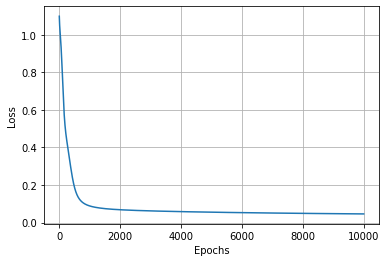

In [57]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

dataset = pd.read_csv('iris.csv').to_numpy()
x = torch.Tensor(dataset[:,0:-1])
y = torch.LongTensor(dataset[:,-1])

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(4, 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 16)
        self.fc4 = torch.nn.Linear(16, 3)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        z = self.fc4(x)
        
        return z

net = Net()
cel = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

loss_lst = []
EPOCH = 10000

for epoch in range(EPOCH):
    z = net(x)
    
    loss = cel(z, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_lst.append(loss.item())

    if epoch % 100 == 0:
        print(f'epoch={epoch}, loss={loss.item():0.5f}')

plt.plot(range(EPOCH), loss_lst)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

z = net(x)
y_hat = torch.argmax(torch.softmax(z,dim=1),dim=1)
correct = torch.sum(y==y_hat)
accuracy = correct / len(y)*100

print(f'Accuracy={accuracy:0.2f}%')

In [56]:
classes = ['setosa', 'versicolor', 'virginica']
test_index = 60
x_test = x[test_index]
y_test = y[test_index]
z_test = net(x_test)
yhat_test = torch.softmax(z_test,dim=0)
val, ind = torch.max(yhat_test,dim=0)
print(f'{x_test}인 꽃은 {val*100:0.2f}%의 확률로 {classes[ind]}라고 예측한다.')
print(f'정답은 {classes[y_test]}이다.')

tensor([5.9000, 3.0000, 4.2000, 1.5000])인 꽃은 99.96%의 확률로 versicolor라고 예측한다.
정답은 versicolor이다.
